**Autor: Leonardo Cesar**

**Contatos: [Linkedin](https://www.linkedin.com/in/leonardo-cesar-4a654114a/), [Github](https://github.com/coderleonardo), [Facebook](https://www.facebook.com/profile.php?id=100044410234185)**

---






# Análise de Dados do problema Drug discovery

## Sobre o projeto$^{[6]}$

O projeto em questão é proposto como desafio final da Imersão Dados da [Alura](https://www.alura.com.br), e tem como base o desafio proposto pelo Laboratory for Innovation Science at Harvard: Mechanisms of Action (MoA) Prediction. Can you improve the algorithm that classifies drugs based on their biological activity?$[6]$

## Motivação

"As pesquisas biomédicas estão cada vez mais interdisciplinares e sofisticadas e os dados gerados nesses estudos são cada vez mais volumosos e complexos, tornando a ciência de dados essencial no desenvolvimento da farmacologia." (Trecho retirado da bibliografia teórica $[4]$).

## Objetivo do projeto$^{[6]}$

Este projeto tem como objetivo melhorar os algoritmos de classificação de drogas baseado nos seus mecanismos de ação (MoA). Formalmente queremos resolver um problema de classificação com vários rótulos.

### Qual é o mecanismo de ação (MoA) de uma droga? E por que isto é importante?

No passado, os cientistas derivavam drogas de produtos naturais ou eram inspirados por remédios tradicionais. Drogas muito comuns, como o paracetamol, conhecido nos Estados Unidos como acetaminofeno, foram colocadas em uso clínico décadas antes que os mecanismos biológicos que impulsionam suas atividades farmacológicas fossem compreendidos. 
<br><br>
Hoje, com o advento de tecnologias mais poderosas, a descoberta de medicamentos mudou das abordagens inesperadas do passado para um modelo mais direcionado baseado na compreensão do mecanismo biológico subjacente de uma doença. 
<br><br>
Nessa nova estrutura, os cientistas buscam identificar um alvo proteico associado a uma doença e desenvolver uma molécula que possa modular essa proteína alvo. Como uma abreviação para descrever a atividade biológica de uma determinada molécula, os cientistas atribuem um rótulo conhecido como mecanismo de ação ou MoA.

### Como determinamos os MoAs de um novo medicamento?

Uma abordagem é tratar uma amostra de células humanas com a droga e, em seguida, analisar as respostas celulares com algoritmos que buscam semelhança com padrões conhecidos em grandes bancos de dados genômicos, como bibliotecas de expressão gênica ou padrões de viabilidade celular de drogas com MoAs conhecidos.




## Conteúdo
(1) Importando as bibliotecas necessárias para a análise dos dados

(2) Importando a base de dados do experimento

(2.1) Analisando os valores presentes em cada coluna

(3) Análise exploratória do conjunto de dados do experimento

(3.1) Relação entre tratamento com_droga e tratamento com_controle

(3.2) Relação entre os tempos para o início da análise

(3.4) Drogas (ou compostos) que mais aparecem no experimento

(3.5) Analisando os valores de alguns genes

(3.5.1) Genes analisados: g-0, g-5, g-10 e g-15

(3.6) Descrição geral dos dados

(3.6.1) Histograma da média sobre as expressões gênicas (genes)

(3.6.2) Gráfico sobre os valores mínimos e máximos das expressões gênicas

(3.6.3) Avaliando o comportamento das Linhagens celulares

(3.6.4) Tabela de frequência de dose x tempo para cada 
tipo de tratamento

(3.6.5) Analisando a correlação - caso particular entre os genes g-0 e g-8

(3.6.6) Correlação entre todos os genes

(4) Importando a base de dados dos resultados obtidos

(5) Análise exploratória do conjunto de dados dos resultados

(5.1) Identificando quantas vezes cada mecanismo de ação foi ativado

(5.2) Conjunto total de ações ativadas por cada droga - avaliando pelo "id" da droga

(6) Modelo de Machine Learning

(6.1) Problema de classificação binária

(6.1.1) Regressão Logística

(6.1.2) Árvore de decisão

(6.1.2.1) Árvore com 3 camadas

(6.1.2.2) Várias árvores com camadas diferentes

(6.1.3) Random Forest - modelo com várias árvores aleatórias (mais dados usados na análise)

(6.1.4) Neighbors Classifier

(7) Conclusões

## (1) Importando as bibliotecas necessárias para a análise dos dados

In [68]:
# Bibliotecas padrão para análise de dados
import pandas as pd
import numpy as np
# Biblioteca padrão para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Bibliotecas para aprendizados de máquina/machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#   Regressão Logística
from sklearn.linear_model import LogisticRegression
#   Classifador Dummy
from sklearn.dummy import DummyClassifier
#   Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#   Random Forest
from sklearn.ensemble import RandomForestClassifier
#   NeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier


## (2) Importando a base de dados do experimento

In [2]:
url_dados = 'https://github.com/coderleonardo/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'
dados_experimentosdf = pd.read_csv(url_dados, compression='zip')

In [3]:
# Tabela representacional dos dados do experimento
dados_experimentosdf

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

In [4]:
# Dimensões da nossa tabela de dados
num_linhas, num_colunas = dados_experimentosdf.shape
print('Temos aqui uma tabela com {} linhas e {} colunas.'.format(num_linhas, num_colunas))

Temos aqui uma tabela com 23814 linhas e 877 colunas.


### (2.1) Analisando os valores presentes em cada coluna

In [5]:
# Valores da coluna "tratamento"
tipos_tratamento = list(dados_experimentosdf['tratamento'].unique())
print('Na nossa coluna tratamento temos somente dois tipos de tratamento presentes: "{}" e "{}".'.format(tipos_tratamento[0], tipos_tratamento[1]))

Na nossa coluna tratamento temos somente dois tipos de tratamento presentes: "com_droga" e "com_controle".


O que são esses tipos de tratamento (com droga e com controle)?
<br><br>
O tratamento "com controle" é um experimento paralelo, em que você submete a sua unidade experimental (por exemplo, cultura de células) ao mesmo protocolo que você submeteu o seu grupo "com droga", porém sem utilizar a droga.
<br><br>
Desta forma, você consegue atribuir variações na sua variável de saída (por exemplo, aumento ou redução da expressão gênica) à presença da droga e não a outro fator relacionado ao experimento que, por ventura, você não previu ou não controlou.

In [6]:
# Valores da coluna "tempo"
valores_tempo = list(dados_experimentosdf['tempo'].unique())
print('Os intervalos de tempo para o início da análise de cada célula variam entre {}h, {}h e {}h.'.format(valores_tempo[0], valores_tempo[1], valores_tempo[2]))

Os intervalos de tempo para o início da análise de cada célula variam entre 24h, 72h e 48h.


In [7]:
# Valores da coluna "dose"
tipos_dose = list(dados_experimentosdf['dose'].unique())
print('As doses ministradas no experimento foram "{}" e "{}" (somente dois tipos de doses).'.format(tipos_dose[0], tipos_dose[1]))

As doses ministradas no experimento foram "D1" e "D2" (somente dois tipos de doses).


In [9]:
# Valores da coluna "droga"
tipos_drogas = list(dados_experimentosdf['droga'].unique())
print('Na coluna "droga" temos as drogas (ou moléculas compostas manipuladas) usadas durante o experimento. No total foram usadas {} drogas diferentes.'.format(len(tipos_drogas)))

Na coluna "droga" temos as drogas (ou moléculas compostas manipuladas) usadas durante o experimento. No total foram usadas 3289 drogas diferentes.


## (3) Análise exploratória do conjunto de dados do experimento

### (3.1) Relação entre tratamento com_droga e tratamento com_controle

In [41]:
# Número de tratamentos com_droga e com_controle
dados_experimentosdf['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [39]:
# Frequência de aparição dos tratamentos no experimento
dados_experimentosdf['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

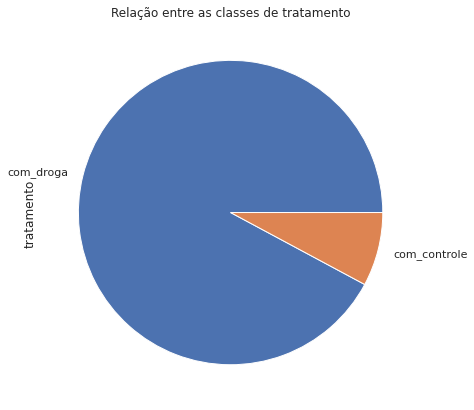

In [13]:
plt.figure(figsize=(8,7))
dados_experimentosdf['tratamento'].value_counts().plot.pie()
plt.title('Relação entre as classes de tratamento')
plt.show()

Vemos do resultado acima que temos uma taxa de $92\%$ de tratamento "com drogas" presentes no nosso experimento, enquanto que temos uma taxa baixíssima de tratamento "com controle" de $8\%$".
<br><br>
Isso nos leva a seguinte pergunta: por que tamanha discrepância entre os dois tipos de tratamento?
<br><br>
Na seção anterior explicamos a diferença entre os tipos de tratamento presentes no experimento. Com isso em mente, temos que a discrepância entre as duas classes de tratamento se deve ao fato do tratamento "com controle" ser somente um parâmetro para controlarmos os possíveis desvios causados por fatores externos no nosso experimento, de modo que nosso interesse real está na análise do tratamento "com droga".

### (3.2) Relação entre os tempos para o início da análise

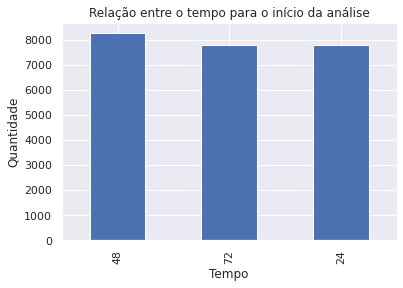

In [14]:
dados_experimentosdf['tempo'].value_counts().plot.bar()
plt.title('Relação entre o tempo para o início da análise')
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.show()

Notamos que o número de experimentos referente a cada tempo possuem uma proporção parecida. O que faz sentido, dado que para termos um experimento bem escalonado devemos ter uma distribuição uniforme entre os tempos.

### (3.4) Drogas (ou compostos) que mais aparecem no experimento

Por questões de generalidade, vamos trocar o nome da nossa coluna "drogas" por "composto"

In [15]:
mapa = {'droga': 'composto'}
dados_experimentosdf.rename(columns=mapa, inplace=True)

Vamos tomar as $5$ drogas mais usadas no experimento.

In [16]:
cod_compostos_mais_usados = dados_experimentosdf['composto'].value_counts().index[:5]

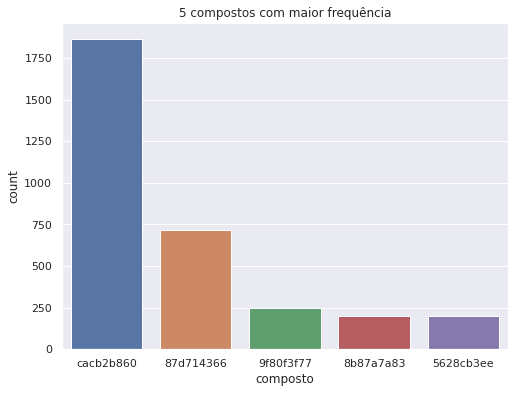

In [17]:
# Histograma dos compostos mais usados
plt.figure(figsize=(8,6))
ax = sns.countplot(x='composto', order=cod_compostos_mais_usados, data=dados_experimentosdf.query('composto in @cod_compostos_mais_usados'))
ax.set_title('5 compostos com maior frequência')
plt.show()

### (3.5) Analisando os valores de alguns genes


Vamos analisar individualmente os valores de algumas colunas respectivas aos genes para vermos se encontramos algum padrão.

#### (3.5.1) Genes analisados: g-0, g-5, g-10 e g-15

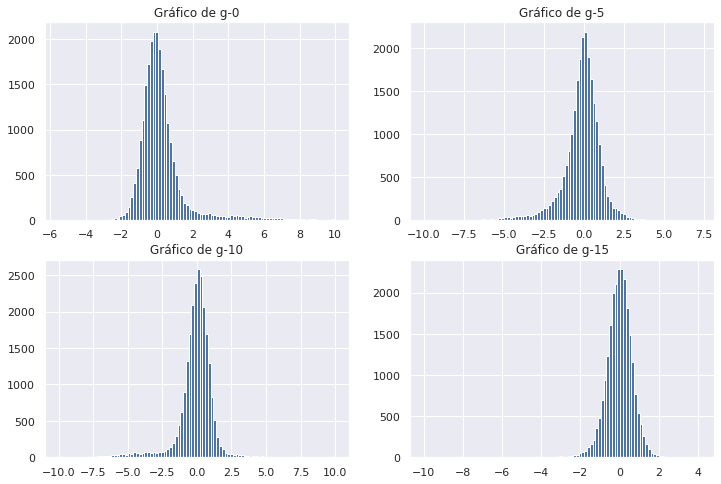

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
dados_experimentosdf['g-0'].hist(bins=100)
plt.title('Gráfico de g-0')
plt.subplot(2, 2, 2)
dados_experimentosdf['g-5'].hist(bins=100)
plt.title('Gráfico de g-5')
plt.subplot(2, 2, 3)
dados_experimentosdf['g-10'].hist(bins=100)
plt.title('Gráfico de g-10')
plt.subplot(2, 2, 4)
dados_experimentosdf['g-15'].hist(bins=100)
plt.title('Gráfico de g-15')
plt.show()

Vemos dos gráficos acima que nosso conjunto de pontos referentes a cada genes formam um gráfico de "sino" (gaussiana/normal)$^{[1]}$ e se acumulam em torno do ponto $0$.
<br><br>
Notamos ainda que é natural esperarmos que os genes associados ao tratamento "com controle" tenham como ponto de acumulação o $0$.

### (3.6) Descrição geral dos dados

In [19]:
# Tabela com valores médio, desvio padrão, valores de máximo e mínimo, etc.
dados_experimentosdf.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.4

#### (3.6.1) Histograma$^{[2]}$ da média sobre as expressões gênicas (genes)

Vamos chamar os nossos genes (os nossos "g's") daqui em diante de "expressões gênicas", e vice-versa. Então daqui em diante usaremos ambas as palavras para nos referirmos ao mesmo objeto.

In [20]:
descricao_expressoes_genicas = dados_experimentosdf.loc[:,'g-0':'g-771'].describe()

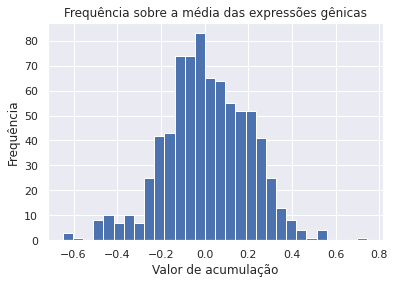

In [21]:
descricao_expressoes_genicas.T['mean'].hist(bins=30)
plt.title('Frequência sobre a média das expressões gênicas')
plt.xlabel('Valor de acumulação')
plt.ylabel('Frequência')
plt.show()

Notamos novamente que assim como o gráfico associados às expressões gênicas nosso histograma acima se aproxima de uma curva gaussiana/normal, o que faz sentido, já que representada o gráfico da média de gaussianas$^{[1]}$.

#### (3.6.2) Gráfico sobre os valores mínimos e máximos das expressões gênicas


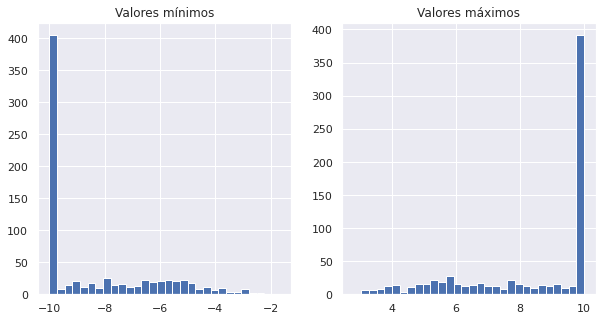

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
descricao_expressoes_genicas.T['min'].hist(bins=30)
plt.title('Valores mínimos')
plt.subplot(1, 2, 2)
descricao_expressoes_genicas.T['max'].hist(bins=30)
plt.title('Valores máximos')
plt.show()

#### (3.6.3) Avaliando o comportamento das Linhagens celulares

Vamos agora analisar o comportamento das nossas linhagens celulares, isto é, os "c's" presente nos nossos dados.

In [23]:
expressao_linhagens_celulares = dados_experimentosdf.loc[:,'c-0':'c-99'].describe()

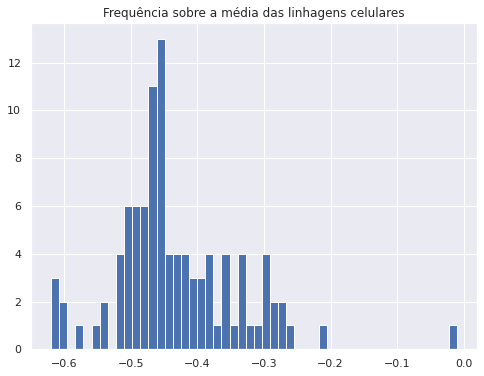

In [24]:
plt.figure(figsize=(8,6))
expressao_linhagens_celulares.T['mean'].hist(bins=50)
plt.title('Frequência sobre a média das linhagens celulares')
plt.show()

Vemos do gráfico acima que nossa frequência sobra as linhagens celulares é menos "comportada" se comparada às expressões gênicas.

#### (3.6.4) Tabela de frequência de dose x tempo para cada tipo de tratamento

In [25]:
pd.crosstab([dados_experimentosdf['dose'], dados_experimentosdf['tempo']], dados_experimentosdf['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

A tabela acima nos mostra aquilo que já haviamos observado antes: o número de doses ao longo do tempo para o tratamento com droga é muito maior do que o caso do tratameto com controle. Isto se deve pelo mesmo fato já discutido anteriormente.

#### (3.6.5) Analisando a correlação - caso particular entre os genes g-0 e g-8

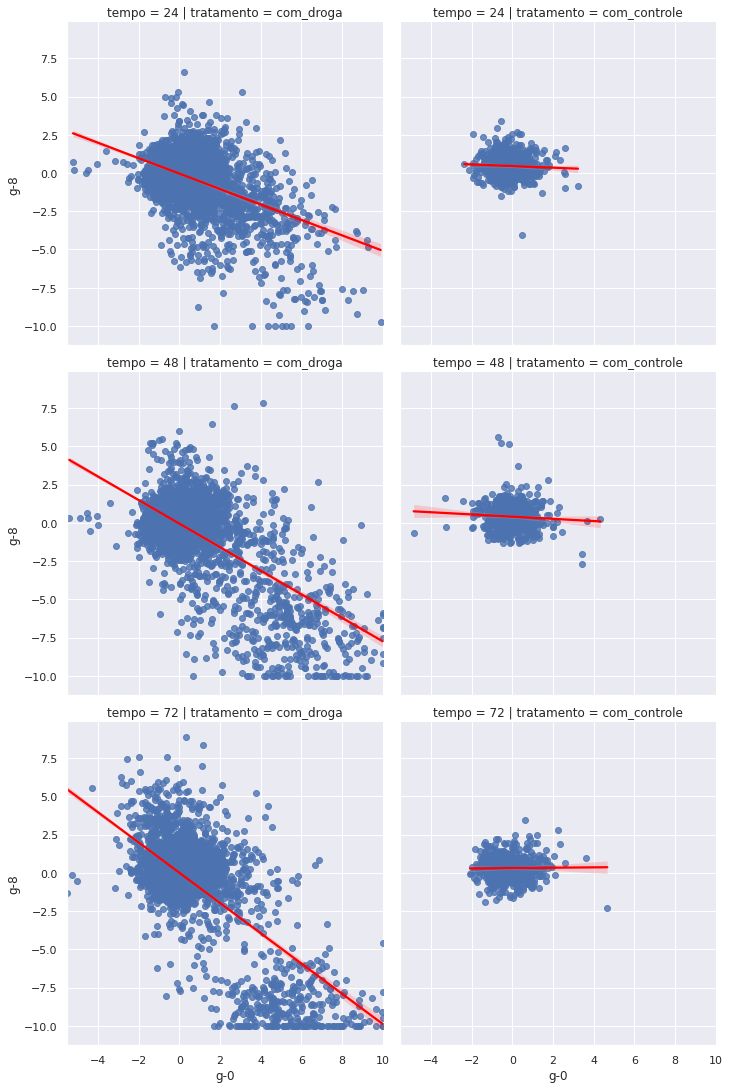

In [26]:
sns.lmplot(data=dados_experimentosdf, x='g-0', y='g-8', line_kws={'color':'red'}, col='tratamento', row='tempo')
plt.show()

Aparentemente temos uma correlação entre as nossas expressões gênicas quando usado o tratamento com droga. Isso pode ser notado analisando a nossa curva em vermelho plotada acima.
<br><br>
O caso para tratamento com controle se comporta como o esperado: correlação quase nula.
<br><br>
Antes de prosseguirmos é importante ressaltarmos que correlação e causalidade são conceitos distintos, isto é, correlação não implica causalidade.

#### (3.6.6) Correlação entre todos os genes

In [27]:
dados_experimentosdf.loc[:, 'g-0':'g-771'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

Note que:
  * Quando temos uma correlação próxima de $+1$ ou $-1$ nossos valores estão bastante relacionados. Se temos o caso positivo temos uma relação diretamente proporcional, caso negativo, inversamente proporcional;
  * Caso tenhamos uma correlação próxima de zero nossos valores são poucos correlacionados.

Vamos olhar para a correlação entre os $50$ primeiros genes do nosso banco de dados.

In [28]:
# Compute the correlation matrix
corr = dados_experimentosdf.loc[:, 'g-0':'g-50'].corr()

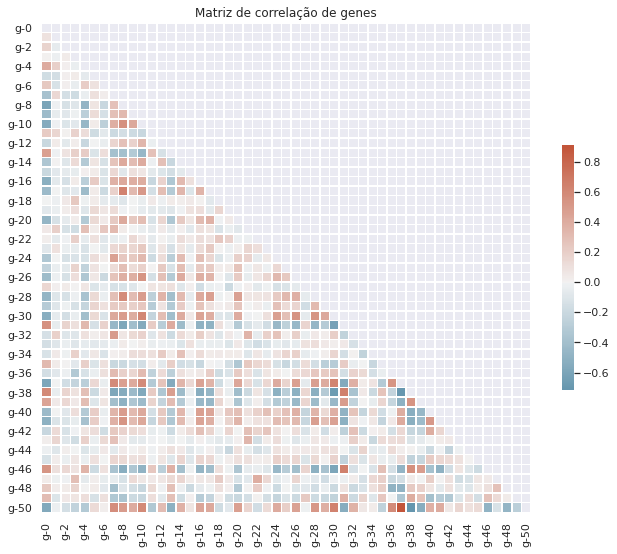

In [29]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Matriz de correlação de genes')
plt.show()

Vamos analisar agora a matriz de correlação entre as nossas linhagens celulares.

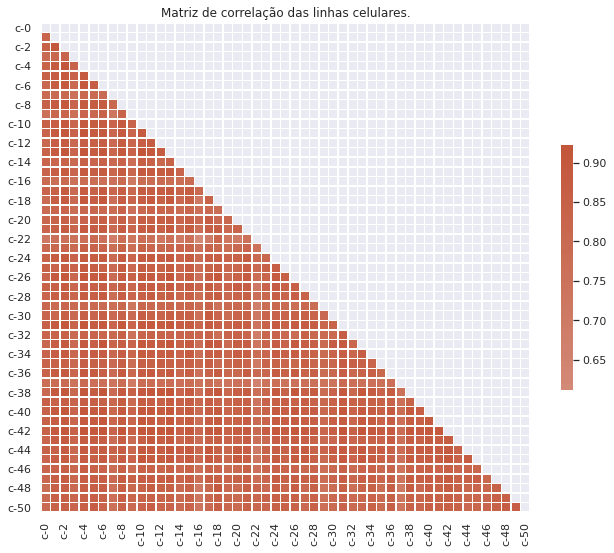

In [30]:
# Compute the correlation matrix
corr_celular = dados_experimentosdf.loc[:, 'c-0':'c-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Matriz de correlação das linhas celulares.")
plt.show()

Os valores c's são a viabilidade celular, isto é, quantas sobreviveram ao tratamento. Note que temos uma correlação bastante forte.

Finalmente, vamos analisar a correlação entre os $50$ primeiros genes e as $50$ primeiras linhagens celulares.

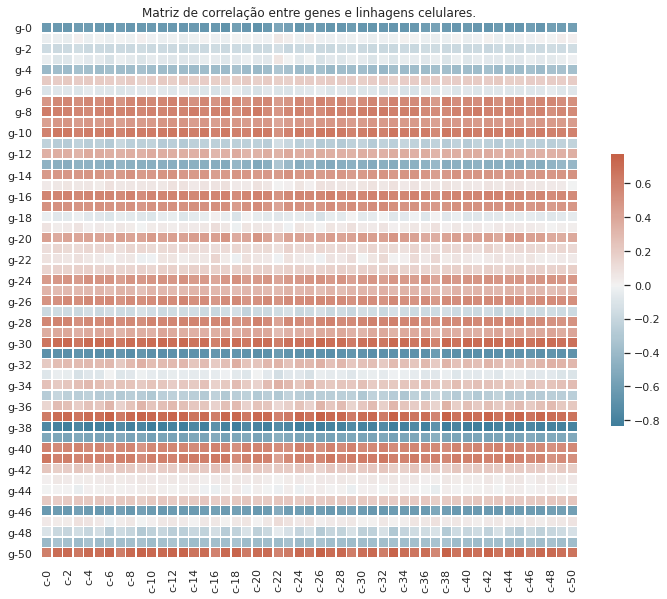

In [55]:
correlacao = dados_experimentosdf.loc[:,'g-0':'c-99'].corr()
corr_celular_genes = correlacao.loc['g-0':'g-50','c-0':'c-50']

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular_genes, cmap=cmap, center=0,
            square=True, annot=False, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Matriz de correlação entre genes e linhagens celulares.')
plt.show()

Notamos uma quantidade bem mista entre fortemente correlacionados e fracamente correlacionados. 
<br><br>
Talvez pudéssemos ter uma perspectiva um pouco melhor separando os genes com tratamento com droga e com controle e plotando novamente nossa matriz de correlação. 
<br><br>
Nesse caso, o natural seria termos uma baixa correlação entre os genes com controle e as linhagens celulares. Portanto, esperamos que na matriz acima os genes pouco relacionados com as linhagens celulares sejam aqueles referentes ao tratamento com controle.

## (4) Importando a base de dados dos resultados obtidos


In [32]:
dados_resultadosdf = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultadosdf.info()
dados_resultadosdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Na tabela acima temos representados os mecanismos de ação das drogas usadas, que serão dados como "ativados" ou "não ativados" sobre o alvo.

## (5) Análise exploratória do conjunto de dados dos resultados

### (5.1) Identificando quantas vezes cada mecanismo de ação foi ativado

Vamos olhar primeiramente para uma coluna da nossa tabela e ver o tipo de informação que conseguimos obter.

In [33]:
dados_resultadosdf['acetylcholine_receptor_agonist'].value_counts()

0    23624
1      190
Name: acetylcholine_receptor_agonist, dtype: int64

Quando o mecanismo de ação é ativado, recemos o valor $1$, enquanto que quando não é, recebemos o valor $0$. Portanto, temos que o mecanismo de ação (MoA) acima foi ativado $190$ vezes, enquanto que não foi em $23624$ vezes.

Vamos agora olhar para todos os nossos mecanismos de ação.

In [34]:
# Mecanismo de ação (MoA) e o número de vezes que o mesmo foi ativado
contagem_moa = dados_resultadosdf.drop('id', axis=1).select_dtypes('int64').sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

### (5.2) Conjunto total de ações ativadas por cada droga - avaliando pelo "id" da droga

In [35]:
# Droga/composto de índice "i" e número de mecanismos de ação ativados
n_moa = dados_resultadosdf.drop('id', axis=1).sum(axis=1)
n_moa

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

Esperamos que os tratamentos com controle não tenham mecanismos ativados.

Vamos atualizar o conjunto de dados com os MoAs e se foi ou não ativado ("True" ou "False").

In [37]:
dados_resultadosdf['n_moa'] = n_moa
dados_resultadosdf['ativo_moa'] = (dados_resultadosdf['n_moa'] != 0)

dados_combinadosdf = pd.merge(dados_experimentosdf, dados_resultadosdf[['id', 'n_moa', 'ativo_moa']], on='id')
dados_combinadosdf.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


Vamos lembrar agora que tinhamos um conjunto de $1866$ de tratamentos com controle.

In [38]:
dados_combinadosdf.query('tratamento == "com_controle"')['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

Do resultado acima obtemos então exatamente o que esperávamos: nenhum tratamento com controle teve mecanismo ativado (o que faz sentido).

Podemos nos perguntar também se algum tratamento com droga teve algum mecanismo de ação não ativado.

In [42]:
dados_combinadosdf.query('tratamento == "com_droga"')['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

De fato, vemos que $14447$ foram ativados e $7501$ não foram.

In [45]:
# Porcentagem de cada valor em relação ao total para os tratamentos com droga
dados_combinadosdf.query('tratamento == "com_droga"')['ativo_moa'].value_counts(normalize=True)

True     0.658238
False    0.341762
Name: ativo_moa, dtype: float64

Segue abaixo ainda a relação entre mecanismos ativados e não ativados no nosso conjunto total de dados.

In [46]:
dados_combinadosdf['ativo_moa'].value_counts(normalize=True)

True     0.60666
False    0.39334
Name: ativo_moa, dtype: float64

Notamos que tanto a porcentagem MoAs ativados em relação ao conjunto de tratamentos com droga e a porcentagem em relação aos tratamento com droga e com controle são parecidas.

## (6) Modelo de Machine Learning$^{[3]}$

In [82]:
dados_combinadosdf.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


### (6.1) Problema de classificação binária

Vamos trabalhar com o seguinte problema de classicação binária: dado um conjunto de valores de entrada queremos que nosso modelo avalie e retorne se este conjunto tem a ele associado um mecanismo de ação (MoA) ativado ou não.
<br>
(Equivalentemente, dado um x multidimensional prevemos um y(x) ("target") binário (0 ou 1).)

#### (6.1.1) Regressão Logística

In [47]:
# Modelando o problema

#   Selecionando o conjunto de dados de entrada do tipo "float"
x = dados_combinadosdf.select_dtypes('float64')
#   Valores de saída
y = dados_combinadosdf['ativo_moa']
#   Separando os conjuntos de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, stratify=y, random_state=475)

# Modelo de Machine Learning
modelo_rlogistica = LogisticRegression(max_iter=1000)
# Treinando
modelo_rlogistica.fit(x_treino, y_treino)
# Capacidade de previsão - porcentagem de acerto nas previsões
print('Porcentagem de acertos na previsão sobre o conjunto de teste: {:.2f}%.'.format(float(100 * modelo_rlogistica.score(x_teste, y_teste))))


Porcentagem de acertos na previsão sobre o conjunto de teste: 62.67%.


Pelo resultado acima vemos que nosso modelo não está na faixa de acertos esperada. Podemos ver isso de imediato pois se lembrarmos que a porcentagem de mecanismos de ação (MoAs) ativados é de $60\%$, vemos que nosso modelo está na mesma faixa de acerto.

Para verificarmos analiticamente a validez do nosso modelo vamos compará-lo com um modelo mais simples de baixo desempenho, o modelo Dummy.

In [48]:
# Modelo
modelo_dummy = DummyClassifier('most_frequent')
# Treinando o modelo
modelo_dummy.fit(x_treino, y_treino)
# Capacidade de previsão
previsao_dummy = modelo_dummy.predict(x_teste)
print('Porcentagem de acertos na previsão sobre o conjunto de teste: {:.2f}%.'.format(100 * float(accuracy_score(y_teste, previsao_dummy))))

Porcentagem de acertos na previsão sobre o conjunto de teste: 60.68%.


Vemos do resultado acima que nosso modelo de Regressão Logística e nosso modelo mais simples possuem porcentagens de acertos semelhante. Portanto, temos que de fato o modelo de regressão adotado acima não é o melhor para o nosso problema.

#### (6.1.2) Árvore de decisão

##### (6.1.2.1) Árvore com 3 camadas

In [49]:
# Selecionando os dados de entrada
x = dados_combinadosdf.select_dtypes('float64')
# Selecionando os dados de saída
y = dados_combinadosdf['ativo_moa']
# Separando os conjuntos de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, stratify=y, random_state=475)
# Modelo (max_depth níveis (número de níveis da nossa árvore))
num_camadas = 3
modelo_arvore = DecisionTreeClassifier(max_depth=num_camadas)
# Treinando o modelo
modelo_arvore.fit(x_treino, y_treino)
# Previsão
print('Porcentagem de acertos na previsão sobre o conjunto de teste: {:.2f}%.'.format(100 * float(modelo_arvore.score(x_teste, y_teste)
)))

Porcentagem de acertos na previsão sobre o conjunto de teste: 60.72%.


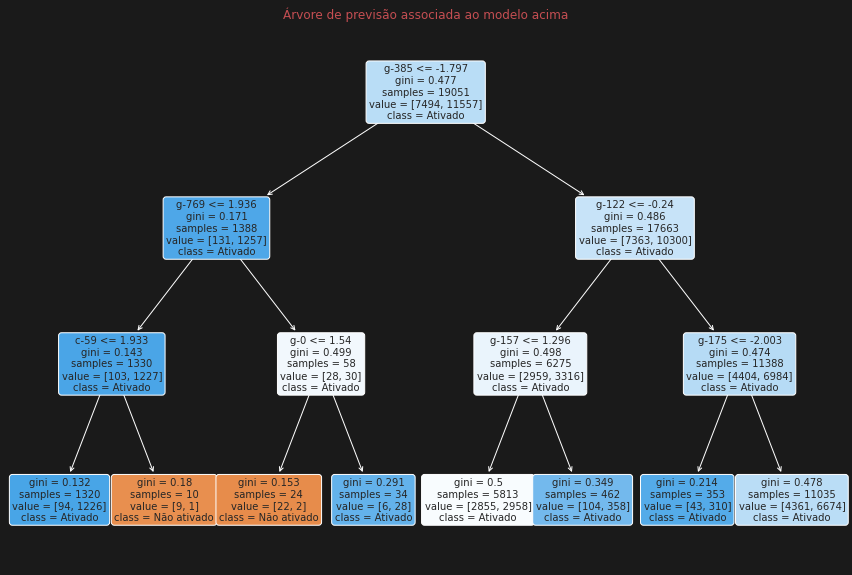

In [50]:
# Árvore de decisão do modelo acima
fig, ax = plt.subplots(figsize=(15,10), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não ativado', 'Ativado'])
titulo = plt.title('Árvore de previsão associada ao modelo acima')
plt.setp(titulo, color='r') 
plt.show()

Vemos que o nosso modelo de árvore de decisão com $3$ camadas também não possui a porcentagem de acerto esperada (que seria em torno de algo $\geq90\%$), e o mesmo tem uma taxa de acerto próxima aos modelos anteriores.

O que podemos tentar avaliar é se aumentando o número de camadas nosso modelo melhora. Vamos fazer isso.

##### (6.1.2.2) Várias árvores com camadas diferentes

In [51]:
# Selecionando os dados de entrada
x = dados_combinadosdf.select_dtypes('float64')
# Selecionando os dados de saída
y = dados_combinadosdf['ativo_moa']
# Separando os conjuntos de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, stratify=y, random_state=475)

teste = []
treino = []

# Mudando a profundidade da nossa árvore
for numCamadas in range(1,15):
  # Modelo max_depth níveis (número de níveis da nossa árvore)
  modelo_arvore = DecisionTreeClassifier(max_depth=numCamadas)
  # Treinando o modelo
  modelo_arvore.fit(x_treino, y_treino)

  treino.append(modelo_arvore.score(x_treino, y_treino))
  # Previsão
  teste.append(modelo_arvore.score(x_teste, y_teste))

In [56]:
# Cada linha abaixo representa a acurácia do modelo sobre os valores de treino conforme aumentamos o número de camadas
treino

[0.6066348223190384,
 0.6066348223190384,
 0.6081045614403443,
 0.6308330271376831,
 0.6359246233793502,
 0.6457928717652617,
 0.654716287858905,
 0.6711983622906934,
 0.6871030392105402,
 0.7012755235945619,
 0.7234790824628629,
 0.7418508214791875,
 0.765366647420083,
 0.7816387591202562]

Vemos então que conforme o número de camadas aumenta nosso modelo fica melhor sobre o conjunto de treino.

In [57]:
# Cada linha abaixo representa a acurácia do modelo sobre os valores de teste conforme aumentamos o número de camadas
teste

[0.6067604450976275,
 0.6067604450976275,
 0.6071803485198405,
 0.6145286584085661,
 0.613058996430821,
 0.6246063405416754,
 0.6222968717195045,
 0.6222968717195045,
 0.6162082720974176,
 0.6187276926306949,
 0.6155784169640982,
 0.6136888515641402,
 0.6115893344530758,
 0.6115893344530758]

Conforme aumentamos o número de camadas nosso modelo não possui melhores resultados sobre o conjunto de teste.

Ou seja, nossos testes ficam tão bons em adivinhar os dados de treino, que não conseguem analisar os dados de teste, temos então caracterizado um "overfit".

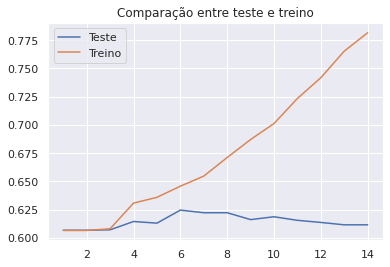

In [58]:
sns.lineplot(x=range(1,15), y=teste, label='Teste')
sns.lineplot(x=range(1,15), y=treino, label='Treino')
plt.title('Comparação entre teste e treino')
plt.show()

#### (6.1.3) Random Forest - modelo com várias árvores aleatórias (mais dados usados na análise)

Afim de podermos analisar nosso problema com o modelo em questão, vamos converter nossos dados referentes aos tipos de tratamento para a linguagem da máquina (binário).

In [59]:
# Retirando os valores que inteferem na análise
x = dados_combinadosdf.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)
# Convertendo as strings para binário - linguagem da máquina
#   Conjunto dos dados de entrada
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
#   Conjunto de saída esperado
y = dados_combinadosdf['ativo_moa']
# Separando os conjuntos de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, stratify=y, random_state=475)

# Modelo 
modeloRandomForest = RandomForestClassifier()
# Treinando o modelo
modeloRandomForest.fit(x_treino, y_treino)

treino.append(modeloRandomForest.score(x_treino, y_treino))
# Previsão
teste.append(modeloRandomForest.score(x_teste, y_teste))

In [60]:
print('Neste modelo obtivemos uma porcentagem de acertos de {:.2f}%'.format(100 * float(modeloRandomForest.score(x_teste, y_teste))))

Neste modelo obtivemos uma porcentagem de acertos de 69.05%


Podemos ainda avaliar nosso modelo olhando para a sua matriz de confusão associada.

In [76]:
# Matriz de confusão associada ao problema
y_predRF = modeloRandomForest.predict(x_teste)>=0.5
matriz_confusaoRF = confusion_matrix(y_teste, y_predRF)
matriz_confusaoRF


array([[ 502, 1371],
       [ 103, 2787]])

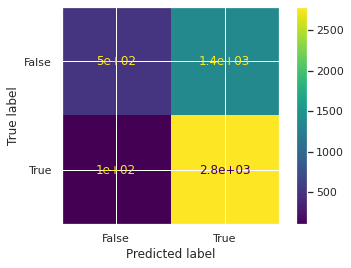

In [77]:
ConfusionMatrixDisplay(confusion_matrix=matriz_confusaoRF, display_labels=modeloRandomForest.classes_).plot()
plt.show()

Da nossa matriz de confusão acima é possível ver que obtivemos: $502$ verdadeiros negativos, $1371$ falsos positivos, $103$ falsos negativos e $2787$ verdadeiros positivos.
<br><br>
Note que somando as diagonais e dividindo pelo valor total obtemos nossa acurácia: $100*((502+2787)/(502+1371+103+2787)) = 69\%$.

#### (6.1.4) Neighbors Classifier

In [78]:
# Modelo
n_neighbors = 3
clf = KNeighborsClassifier(n_neighbors)
# Treinando o modelo
clf.fit(x_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [79]:
# Previsão do modelo
print('Porcentagem de acerto sobre o modelo de teste: {:.2f}%'.format(100 * float(clf.score(x_teste, y_teste))))

Porcentagem de acerto sobre o modelo de teste: 61.24%


In [80]:
# Matriz de confusão associada ao problema
y_predN = clf.predict(x_teste)>=0.5
matriz_confusaoN = confusion_matrix(y_teste, y_predN)
matriz_confusaoN


array([[ 804, 1069],
       [ 777, 2113]])

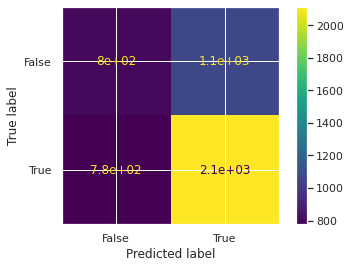

In [81]:
ConfusionMatrixDisplay(confusion_matrix=matriz_confusaoN, display_labels=clf.classes_).plot()
plt.show()

## (7) Conclusões

Analisando tanto os dados experimentais quanto os dados dos resultados observamos que o nosso experimento se comportava razoalmente de acordo com o que esperávamos em teoria, de modo que nosso maior esforço seria encontrar o melhor modelo para classificarmos nosso problema.
<br><br>
Considerando o problema de classificar se um composto teve ou não seu mecanismo de ação (MoA) ativado, obtivemos bastante dificuldade em obter um modelo altamente satisfatório, ficando com no máximo uma taxa de acerto de aproximadamente $70\%$, referente ao nosso modelo "Random Forest".
<br><br>
Porém, se levarmos em conta que o ser humano levaria muito mais tempo e teria uma dificuldade muito maior em analisar um conjunto de dados muito menor, temos que nosso modelo (Random Forest, no caso) é aceitável 
<br><br>
Portanto, mesmo que não da forma mais satisfatória que poderíamos queríamos, obtivemos o resultado que esperávamos, que era obter o melhor modelo de classificação para o nosso problema dentro do prazo estabelecido juntamente com as ferramentas disponíveis. 
<br><br>


## Fontes

### Bibliografia teórica e matemática

  * [1] [Leia mais sobre curva Gaussiana clicando aqui.](https://www.inf.ufsc.br/~andre.zibetti/probabilidade/normal.html)
  * [2] [Leia mais sobre Histogramas clicando aqui.](https://www.alura.com.br/artigos/o-que-e-um-histograma?utm_source=gnarus&utm_medium=timeline)
  * [3] [Leia mais sobre como escolher um modelos= de Machine Learning para seu problema clicando aqui.](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
  * [4] [Drug Discovery - Passado, presente e futuro.](https://docs.google.com/document/d/10EhrQBChlyYIcff3to7PrCQi5HcNk2r-zd2ZCKPtcz8/edit)
  * [5] [Expressão gênica: o caminho da informação biológica.](https://drive.google.com/file/d/1VNP08ffCiGD8cqaBkdHATWSX8Yxfm3dj/view?usp=sharing)
  * [6] [Mechanisms of Action (MoA) Prediction. Can you improve the algorithm that classifies drugs based on their biological activity? - Página oficial do desafio proposto pelo Laboratory for Innovation Science at Harvard.](https://www.kaggle.com/c/lish-moa)
  * [7] [Como saber se seu modelo de Machine Learning está funcionando mesmo?](https://paulovasconcellos.com.br/como-saber-se-seu-modelo-de-machine-learning-está-funcionando-mesmo-a5892f6468b)

### Bibliotecas usadas

  * Pandas - Análise de dados: https://pandas.pydata.org
  * Numpy - Computação científica com Python: https://numpy.org
  * Matplotlib - Visualização de dados: https://matplotlib.org
  * Seaborn - Visualização estatística de dados: https://seaborn.pydata.org
  * Scikit-learn - Machine Learning com Python: https://scikit-learn.org/stable/

## Agradecimentos

Gostaria de agradecer à [Alura](https://www.alura.com.br) pela oportunidade de participar desta imersão estudando um assunto totalmente novo para mim (que é a ciência de dados aplicada à Biologia) e também por proporcionar tamanho em num período tão curto de tempo.
<br><br>
Gostaria de agradecer também aos instrutores [Guilherme Silveira](https://www.linkedin.com/in/guilhermeazevedosilveira/), [Vanessa Leiko](https://www.linkedin.com/in/vanessa-leiko-oikawa-cardoso/) e [Thiago Gonçalves](https://www.linkedin.com/in/thiago-gonçalves-santos/), que nos auxiliaram e guiaram ao longo desse estudo.